In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re

In [3]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.shape

(20800, 5)

In [71]:
df.size

104000

In [9]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 568.8+ KB


In [13]:
# Find out count of null values
print("Null values :")
print(df.isnull().sum())

Null values :
id           0
title      558
author    1957
text        39
label        0
dtype: int64


<AxesSubplot:>

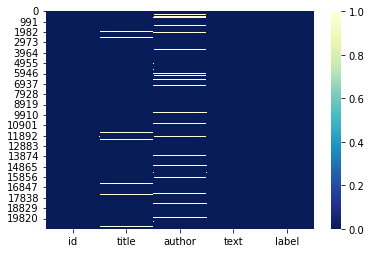

In [5]:
#Generating heatmap for null values
sns.heatmap(df.isnull(),cmap='YlGnBu_r')
#plt.figure(figsize=(30,20))

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
df=df.fillna(' ')

In [61]:
df['text']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 20800, dtype: object

the 920586
to 426276
of 418156
and 383023
in 311144
that 217827
is 156845
for 144756
on 130799
it 125228
with 102572
he 102434
was 101727
as 99072
said 80054
by 78684
are 73717
at 73574
have 72417
be 71739


<AxesSubplot:title={'center':'Top 20 words in dataset before removing stop words'}, xlabel='text'>

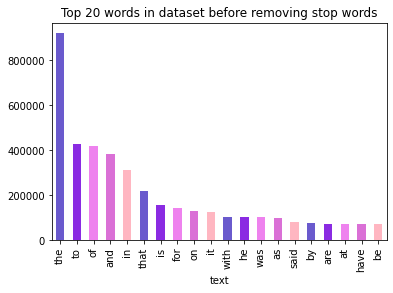

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus,n=None):
    words = CountVectorizer().fit(corpus)
    collected_words = words.transform(corpus)
    sum_words = collected_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in words.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)
    return words_freq[:n]
high_freq_words = get_top_n_words(df['text'],20)
for word, freq in high_freq_words:
    print(word, freq)
df1 = pd.DataFrame(high_freq_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 words in dataset before removing stop words',color=['slateblue', 'blueviolet', 'violet', 'orchid', 'lightpink'])

<AxesSubplot:title={'center':'Number of True vs Fake News'}, ylabel='Frequency'>

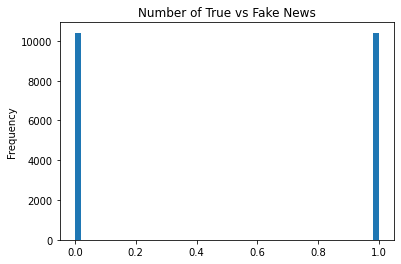

In [72]:
df['label'].plot(
    kind='hist',
    bins=50,
    title='Number of True vs Fake News')

In [100]:
len('hello world')

11

# Merge the columns

In [115]:
df['content']=df['title']+' '+df['author']+df['text']

# Eliminating stop words and punctuations

In [118]:
import nltk

In [117]:
! pip install nltk

     ---------------------------------------- 1.5/1.5 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 5.4 MB/s eta 0:00:00
     -------------------------------------- 255.5/255.5 kB 3.9 MB/s eta 0:00:00


In [122]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [125]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [126]:
from nltk.corpus import stopwords
# corpus of nltk will hold the stopwords

stop=stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [127]:
import string
punctuations_list = list(string.punctuation)

In [128]:
print(punctuations_list)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [129]:
eliminate_tokens=stop+punctuations_list

In [131]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


True

In [133]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


True

In [136]:
from nltk.stem import WordNetLemmatizer 
lemmatizer=WordNetLemmatizer()
for ind,row in df.iterrows(): 
    filtered_sentence = ''
    
    sentence = row['content']
    sentence = re.sub(r'[^\w\s]','',sentence) 
    words = nltk.word_tokenize(sentence) #tokenizing each sentence
    
    words = [w for w in words if not w in eliminate_tokens]  #eliminating the stopwords and punctuations
    
    #applying the WornNet Lemmatizer
    for word in words:
        filtered_sentence = filtered_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    # add the filtered sentence to dataframe at same position 
    df.loc[ind,'content'] = filtered_sentence

said 80090
mr 66291
trump 47614
new 37077
people 36690
year 31742
like 26786
president 25134
time 24955
state 24849
clinton 23484
government 17869
day 17650
country 17583
say 16922
world 16241
american 15774
make 15376
news 15226
election 15121


<AxesSubplot:title={'center':'Top 20 words in dataset after text-preprocessing'}, xlabel='content'>

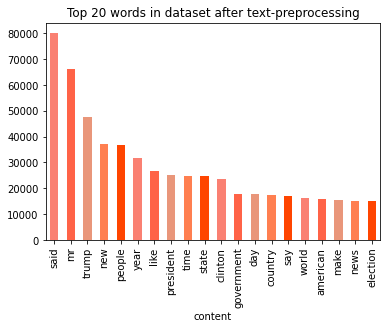

In [139]:
def get_top_n_words_aftr_clean(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words_aftr_clean(df['content'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['content' , 'count'])
df2.groupby('content').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 20 words in dataset after text-preprocessing',color=['salmon', 'tomato', 'darksalmon', 'coral', 'orangered'])

In [140]:
def plot_word_number_histogram(textno, textye):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 6), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Reliable')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('Unreliable')
    
    fig.suptitle('Fake News', fontsize=24, va='baseline')
    
    fig.tight_layout()


c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


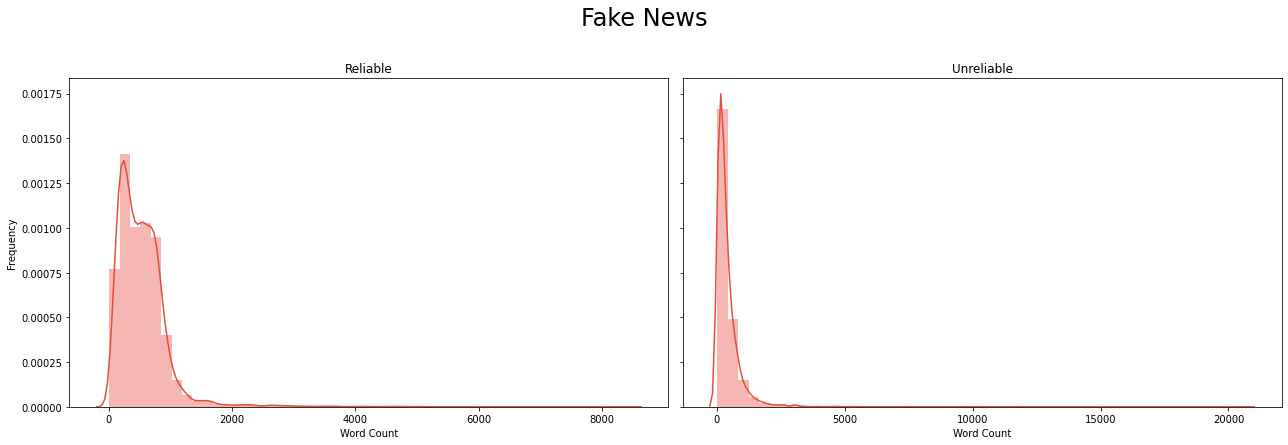

In [142]:
plot_word_number_histogram(df[df['label'] == 0]['content'],df[df['label'] == 1]['content'])